In [2]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# load data
data = pd.read_csv('hem.csv')

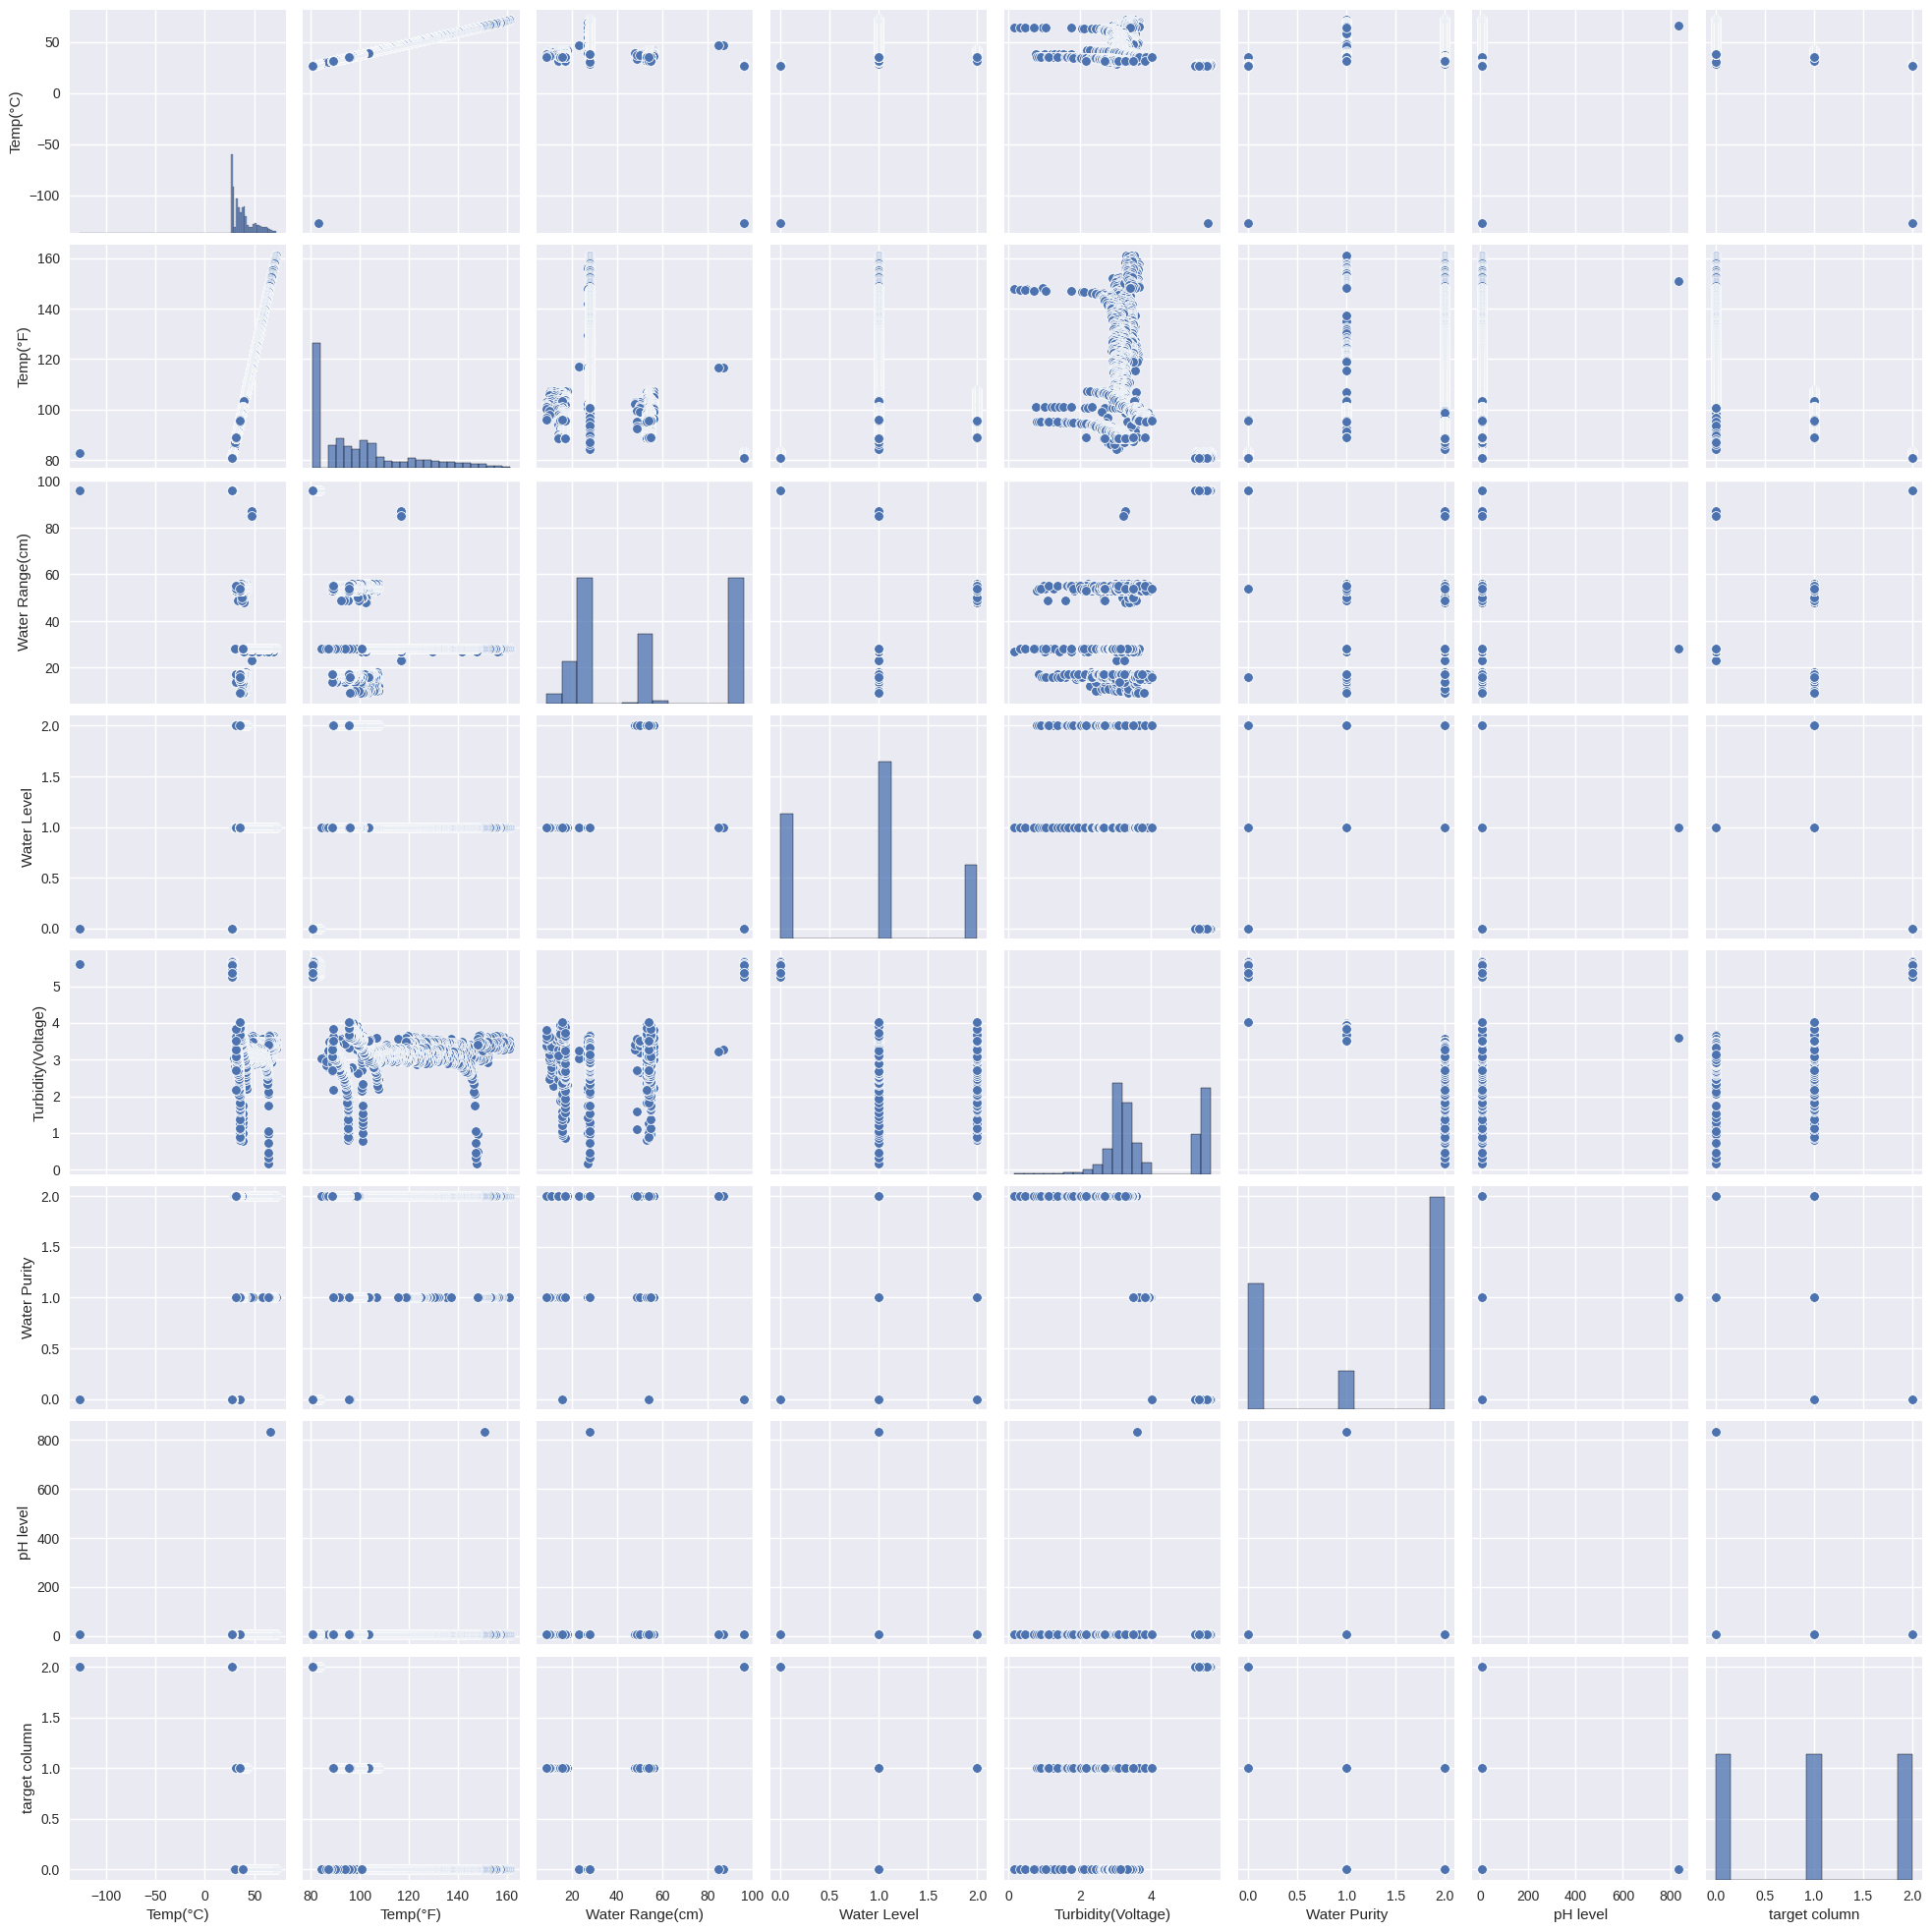

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

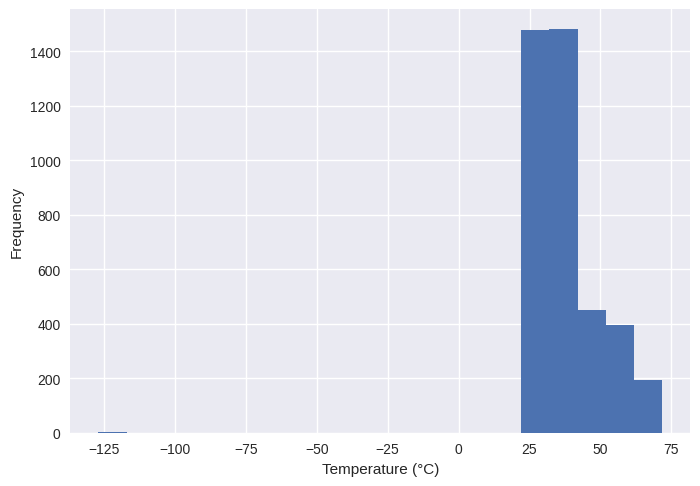

In [24]:
plt.hist(data['Temp(°C)'], bins=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

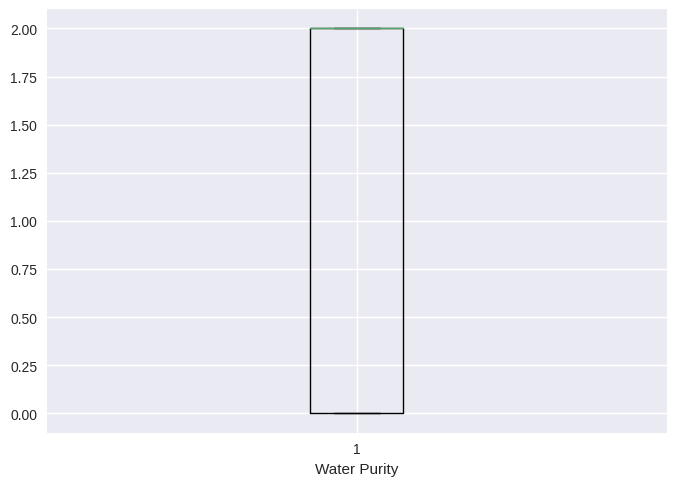

In [25]:
plt.boxplot(data['Water Purity'])
plt.xlabel('Water Purity')
plt.show()

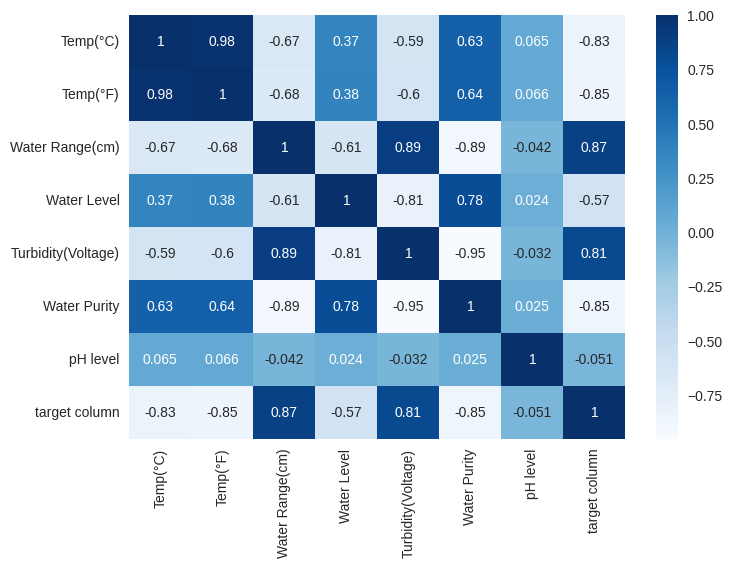

In [26]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()


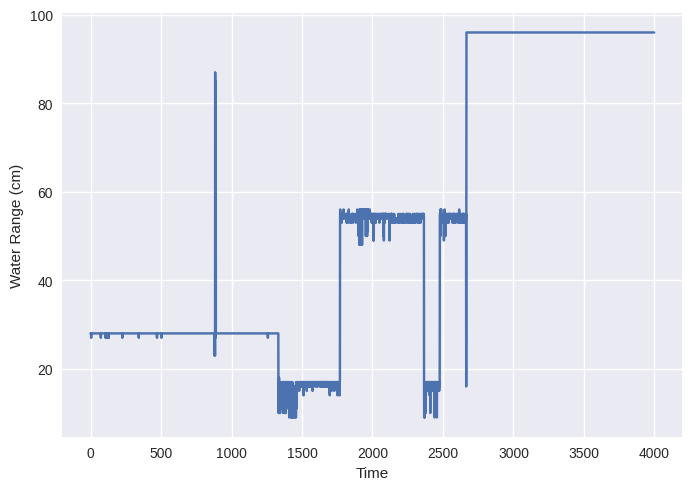

In [27]:
plt.plot(data['Water Range(cm)'])
plt.xlabel('Time')
plt.ylabel('Water Range (cm)')
plt.show()


In [4]:
import pandas as pd

# Drop the Time column
data.drop(data.columns[0], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()

# Encode each object column with the LabelEncoder
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[col])

# Save the encoded data to a new CSV file
data.to_csv('encoded_waterdata.csv', index=False)


In [9]:
# separate target variable
target = data['target column']
features = data.drop('target column', axis=1)

In [10]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# build random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [12]:
# make predictions on test data
y_pred = rfc.predict(X_test)

In [13]:
# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.99875


AUC-ROC score: 0.9999955099184853


<ipython-input-15-28396bff8645>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


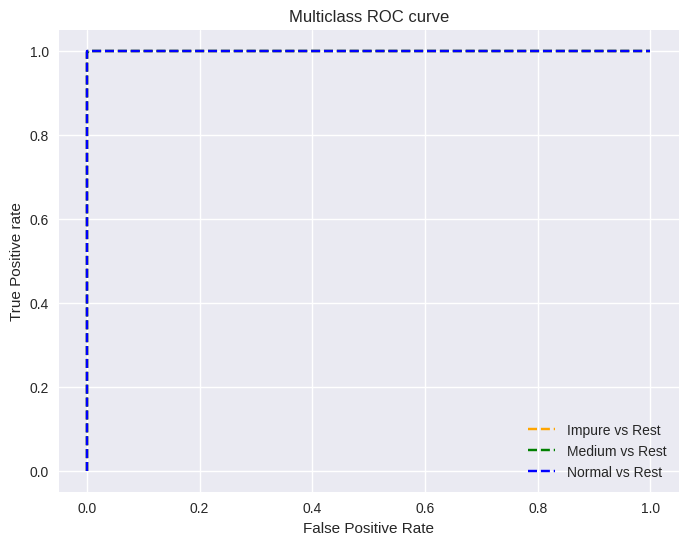

In [15]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# calculate probabilities for each class
probs = rfc.predict_proba(X_test)

# calculate AUC-ROC score
auc_score = roc_auc_score(y_test, probs, multi_class='ovo', average='weighted')
print('AUC-ROC score:', auc_score)

# calculate ROC curve for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(rfc.classes_)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=rfc.classes_[i])

# plot ROC curve for each class
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Impure vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Normal vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()



In [16]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       243

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[[283   1   0]
 [  0 273   0]
 [  0   0 243]]


In [17]:
from sklearn.tree import export_graphviz

# Select a tree from the forest (e.g. the first tree)
tree = rfc.estimators_[0]

# Export the tree to a DOT file
export_graphviz(tree, out_file='tree.dot', 
                feature_names=X_train.columns, 
                class_names=['Impure', 'Medium', 'Normal'], 
                rounded=True, proportion=False, 
                precision=2, filled=True)

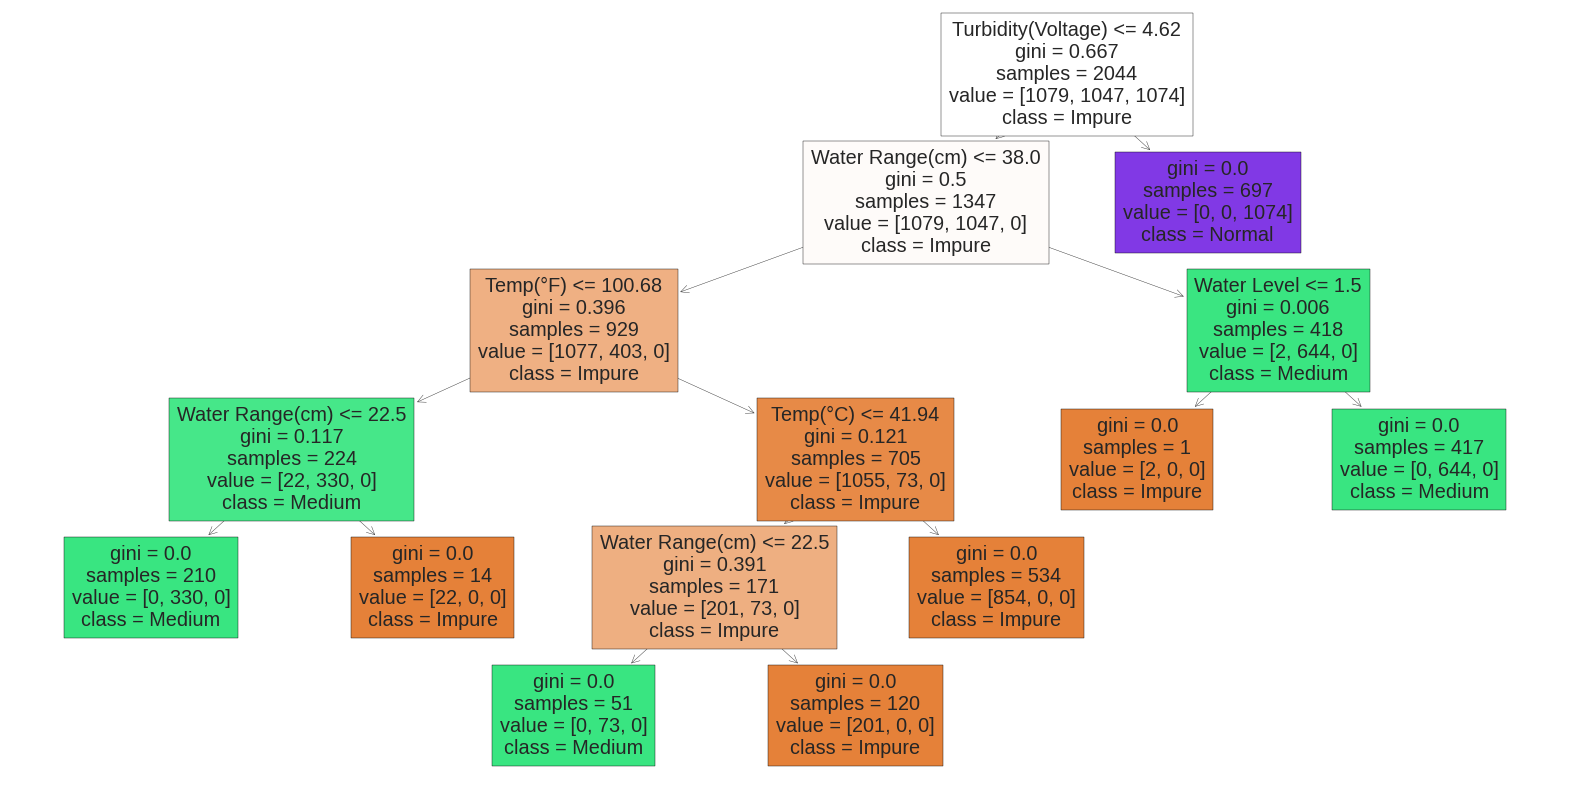

In [18]:
from sklearn.tree import plot_tree

# Plot the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=['Impure', 'Medium', 'Normal'], 
          filled=True)
plt.show()

In [22]:
import numpy as np

# Load the trained model
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

# Create a dictionary to store the feature values entered by the user
user_input = {}

# Ask the user to enter the feature values
user_input['Temp(°C)'] = float(input('Enter the temperature in degrees Celsius: '))
user_input['Temp(°F)'] = float(input('Enter the temperature in degrees Fahrenheit: '))
user_input['Water Range(cm)'] = float(input('Enter the water range in cm: '))
user_input['Water Level'] = int(input('Enter the water level: '))
user_input['Turbidity(Voltage)'] = float(input('Enter the turbidity voltage: '))
user_input['Water Purity'] = float(input('Enter the water purity value: '))
user_input['pH level'] = float(input('Enter the pH level: '))

# Convert the user input dictionary into a numpy array
user_input_array = np.array([list(user_input.values())])

# Make predictions using the random forest classifier
output = rfc.predict(user_input_array)[0]

# Define a dictionary to map the labels to the corresponding values
label_map = {0: 'Impure', 1: 'Medium', 2: 'Normal'}

# Use np.where() to replace the predicted value with the corresponding label
output = np.where(output == 0, 'Impure', np.where(output == 1, 'Medium', 'Normal'))

# Print the predicted output
print('The water is classified as:', output)

Enter the temperature in degrees Celsius: 38.56
Enter the temperature in degrees Fahrenheit: 101.41
Enter the water range in cm: 28
Enter the water level: 1
Enter the turbidity voltage: 3.59
Enter the water purity value: 1
Enter the pH level: 8.11
The water is classified as: Impure


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
